In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
torch.manual_seed(190401095)

# 1. Veri Yükleme ve Veriyi Keşfetme

In [4]:
train_dataset = pd.read_csv("/content/cure_the_princess_train.csv")
val_dataset = pd.read_csv("/content/cure_the_princess_validation.csv")
test_dataset = pd.read_csv("/content/cure_the_princess_test.csv")

In [5]:
train_dataset.head()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,18.8,1.5,19.7,1.1,19.5,30.1,16.5,9.9,27.3,1.8,18.9,25.3,2.0,1
1,6.0,3.8,12.4,16.9,13.0,12.6,17.0,25.4,7.7,14.6,3.8,23.7,17.9,0
2,22.4,7.9,28.6,11.2,5.4,9.3,11.5,10.7,9.4,11.1,21.4,29.1,7.5,0
3,10.8,4.6,5.1,16.7,20.8,27.1,7.8,15.5,34.0,7.6,16.5,27.3,3.2,1
4,3.7,5.7,9.0,3.3,17.4,33.3,7.6,20.1,11.5,6.1,5.2,6.1,1.9,0


In [6]:
train_dataset["Cured"].value_counts()

0    635
1    617
Name: Cured, dtype: int64

Toplamda 2 adet sınıfımız var. Modelimiz sonuç olarak tek bir kategori tahmininde bulunacağından output layerda tek bir nöron olacak.

In [7]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  1252 non-null   float64
 1   Unicorn Horn     1252 non-null   float64
 2   Dragon's Blood   1252 non-null   float64
 3   Mermaid Tears    1252 non-null   float64
 4   Fairy Dust       1252 non-null   float64
 5   Goblin Toes      1252 non-null   float64
 6   Witch's Brew     1252 non-null   float64
 7   Griffin Claw     1252 non-null   float64
 8   Troll Hair       1252 non-null   float64
 9   Kraken Ink       1252 non-null   float64
 10  Minotaur Horn    1252 non-null   float64
 11  Basilisk Scale   1252 non-null   float64
 12  Chimera Fang     1252 non-null   float64
 13  Cured            1252 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 137.1 KB


In [8]:
val_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  314 non-null    float64
 1   Unicorn Horn     314 non-null    float64
 2   Dragon's Blood   314 non-null    float64
 3   Mermaid Tears    314 non-null    float64
 4   Fairy Dust       314 non-null    float64
 5   Goblin Toes      314 non-null    float64
 6   Witch's Brew     314 non-null    float64
 7   Griffin Claw     314 non-null    float64
 8   Troll Hair       314 non-null    float64
 9   Kraken Ink       314 non-null    float64
 10  Minotaur Horn    314 non-null    float64
 11  Basilisk Scale   314 non-null    float64
 12  Chimera Fang     314 non-null    float64
 13  Cured            314 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.5 KB


In [9]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Phoenix Feather  772 non-null    float64
 1   Unicorn Horn     772 non-null    float64
 2   Dragon's Blood   772 non-null    float64
 3   Mermaid Tears    772 non-null    float64
 4   Fairy Dust       772 non-null    float64
 5   Goblin Toes      772 non-null    float64
 6   Witch's Brew     772 non-null    float64
 7   Griffin Claw     772 non-null    float64
 8   Troll Hair       772 non-null    float64
 9   Kraken Ink       772 non-null    float64
 10  Minotaur Horn    772 non-null    float64
 11  Basilisk Scale   772 non-null    float64
 12  Chimera Fang     772 non-null    float64
 13  Cured            772 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 84.6 KB


Model eğitiminde train_dataset içerisinde yer alan verileri kullanacağız. Buradaki verileri girdiler ve çıktılar olarak bölmemiz gerekiyor.

In [10]:
train_inputs = train_dataset.iloc[:,:-1]
train_inputs.head()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang
0,18.8,1.5,19.7,1.1,19.5,30.1,16.5,9.9,27.3,1.8,18.9,25.3,2.0
1,6.0,3.8,12.4,16.9,13.0,12.6,17.0,25.4,7.7,14.6,3.8,23.7,17.9
2,22.4,7.9,28.6,11.2,5.4,9.3,11.5,10.7,9.4,11.1,21.4,29.1,7.5
3,10.8,4.6,5.1,16.7,20.8,27.1,7.8,15.5,34.0,7.6,16.5,27.3,3.2
4,3.7,5.7,9.0,3.3,17.4,33.3,7.6,20.1,11.5,6.1,5.2,6.1,1.9


In [11]:
train_labels = train_dataset.iloc[:,-1]
train_labels

0       1
1       0
2       0
3       1
4       0
       ..
1247    1
1248    1
1249    0
1250    1
1251    0
Name: Cured, Length: 1252, dtype: int64

**train_inputs** değişkenine girdilerimizi, **train_labels** değişkenine ise girdilere karşılık gelen sonuçları atadık. Şimdi bunları tensöre çevirelim.

In [12]:
train_inputs = torch.tensor(train_inputs.values, dtype=torch.float32)
train_inputs

tensor([[18.8000,  1.5000, 19.7000,  ..., 18.9000, 25.3000,  2.0000],
        [ 6.0000,  3.8000, 12.4000,  ...,  3.8000, 23.7000, 17.9000],
        [22.4000,  7.9000, 28.6000,  ..., 21.4000, 29.1000,  7.5000],
        ...,
        [22.4000, 19.6000,  7.4000,  ..., 12.2000, 15.4000,  8.3000],
        [22.5000, 12.5000, 24.5000,  ...,  5.5000, 12.7000, 25.9000],
        [12.3000, 17.6000, 13.0000,  ...,  4.5000, 11.1000,  6.0000]])

In [13]:
train_inputs.size()

torch.Size([1252, 13])

In [14]:
train_labels = torch.tensor(train_labels.values, dtype=torch.float32)
train_labels

tensor([1., 0., 0.,  ..., 0., 1., 0.])

In [15]:
train_labels.size()

torch.Size([1252])

Aynı işlemleri validation ve test setindeki verilerimiz için de yapalım.

In [16]:
val_inputs = val_dataset.iloc[:,:-1]
val_inputs

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang
0,13.1,7.6,11.6,11.0,4.7,26.8,6.1,4.5,17.1,8.6,10.0,13.7,18.6
1,24.8,26.4,13.4,3.7,8.8,37.0,1.7,14.3,30.2,5.1,2.0,2.7,5.6
2,5.8,21.2,6.8,13.2,26.2,14.5,20.1,26.4,9.0,3.1,6.5,17.9,3.8
3,6.5,13.8,25.5,3.8,12.9,5.0,1.9,18.7,1.4,9.4,24.4,22.7,10.7
4,22.1,17.4,4.9,20.8,10.8,9.4,7.3,15.2,33.5,15.2,20.0,18.6,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,19.4,21.1,16.2,10.1,17.7,13.7,14.8,24.9,5.3,12.2,10.6,14.8,16.3
310,1.2,8.0,20.4,2.0,33.4,19.6,22.1,10.4,18.9,5.9,18.2,16.4,8.5
311,21.9,5.5,11.5,5.0,27.9,20.9,20.5,22.7,33.9,7.4,3.6,38.4,5.2
312,4.4,24.4,10.5,24.1,26.3,6.5,27.1,22.6,9.4,22.1,21.2,25.5,4.0


In [17]:
val_labels = val_dataset.iloc[:,-1]
val_labels

0      0
1      1
2      1
3      0
4      1
      ..
309    0
310    1
311    1
312    0
313    1
Name: Cured, Length: 314, dtype: int64

In [18]:
test_inputs = test_dataset.iloc[:,:-1]
test_inputs

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang
0,10.0,15.3,27.1,13.3,18.1,12.3,4.8,24.0,10.0,17.5,5.9,27.6,8.6
1,31.6,1.9,25.2,17.9,16.4,2.4,4.2,6.4,32.5,21.9,19.7,12.4,17.4
2,22.4,9.2,23.7,14.9,18.2,10.5,6.8,15.3,21.0,16.8,31.6,19.4,11.6
3,24.5,2.3,2.2,26.2,7.3,2.8,20.6,7.8,23.0,17.0,2.7,7.6,26.0
4,3.2,20.2,12.9,13.3,7.7,29.6,2.6,12.9,12.7,13.8,8.9,6.5,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,13.7,2.7,15.4,5.1,11.9,4.2,4.4,5.1,15.2,13.2,3.5,9.4,19.3
768,24.3,5.6,19.4,10.0,15.3,23.8,4.4,13.7,31.7,13.2,15.2,11.5,4.9
769,5.7,2.1,22.3,26.0,23.9,20.9,29.6,13.4,10.9,21.9,4.7,21.9,11.1
770,6.8,16.1,17.5,20.9,2.3,10.6,20.3,15.3,21.9,18.8,3.5,17.6,17.4


In [19]:
test_labels = test_dataset.iloc[:,-1]
test_labels

0      0
1      1
2      0
3      1
4      0
      ..
767    1
768    1
769    1
770    1
771    0
Name: Cured, Length: 772, dtype: int64

In [20]:
val_inputs = torch.tensor(val_inputs.values, dtype=torch.float32)
val_labels = torch.tensor(val_labels.values, dtype=torch.float32)
test_inputs = torch.tensor(test_inputs.values, dtype=torch.float32)
test_labels = torch.tensor(test_labels.values, dtype=torch.float32)

Bütün verilerimizi tensör haline getirdik. Özet olarak boyutlarını gözden geçirelim.

In [21]:
print("TRAIN SETİ\n*****************")
print(f"Girdi: {train_inputs.size()}, Etiketler: {train_labels.size()}\n")

print("VALIDATION SETİ\n****************")
print(f"Girdi: {val_inputs.size()}, Etiketler: {val_labels.size()}\n")

print("TEST SETİ\n****************")
print(f"Girdi: {test_inputs.size()}, Etiketler: {test_labels.size()}\n")

TRAIN SETİ
*****************
Girdi: torch.Size([1252, 13]), Etiketler: torch.Size([1252])

VALIDATION SETİ
****************
Girdi: torch.Size([314, 13]), Etiketler: torch.Size([314])

TEST SETİ
****************
Girdi: torch.Size([772, 13]), Etiketler: torch.Size([772])



Verilerimizi tensör haline getirdik. Bunları derste yapılan eğitime benzemesi için DataLoader() formatına verilecek şekilde düzenlememiz lazım. 

Kendi trainset değişkenimizi aşağıda oluşturalım.

In [22]:
from torch.utils.data import TensorDataset, DataLoader

In [23]:
BATCH_SIZE=16

In [24]:
trainset = TensorDataset(train_inputs, train_labels)

trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

In [25]:
valset = TensorDataset(val_inputs, val_labels)

valloader = DataLoader(valset, batch_size=BATCH_SIZE, shuffle=True)

In [26]:
testset = TensorDataset(test_inputs, test_labels)

testloader = DataLoader(testset, shuffle=True)

DataLoader() ile veri setlerimizi hazırlıyoruz.

In [27]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

Eğitimde kullanacağımız yapay sinir ağını oluşturalım.

# Modelin Oluşturulması ve Eğitimi

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear( 13, 100 ) 
        self.fc2 = nn.Linear( 100, 50 )
        self.fc3 = nn.Linear( 50, 1 ) 

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x



Epoch 1 train loss: 0.5901800341243986, validation loss: 0.5203353971242904
Epoch 2 train loss: 0.5172030971020083, validation loss: 0.46392943263053893
Epoch 3 train loss: 0.47183412577532513, validation loss: 0.4567879378795624
Epoch 4 train loss: 0.4448645695855346, validation loss: 0.4142723843455315
Epoch 5 train loss: 0.4158190328486358, validation loss: 0.36462675631046293
Epoch 6 train loss: 0.39718409976627256, validation loss: 0.34086466729640963
Epoch 7 train loss: 0.38141585528096067, validation loss: 0.32319440469145777
Epoch 8 train loss: 0.3667998721327963, validation loss: 0.32944555655121804
Epoch 9 train loss: 0.35519745172579076, validation loss: 0.3195334367454052
Epoch 10 train loss: 0.3411712174928641, validation loss: 0.2914761111140251
Epoch 11 train loss: 0.32846831784972663, validation loss: 0.29019072502851484
Epoch 12 train loss: 0.32486248242704174, validation loss: 0.27242584712803364
Epoch 13 train loss: 0.3142000219867199, validation loss: 0.265653619170

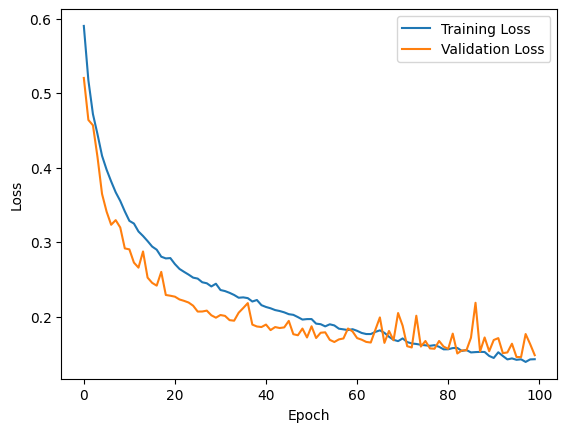

Finished Training


In [29]:
model = Net()
LEARNING_RATE=0.001
EPOCHS=100

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

train_losses = []
val_losses = []

model = model.to(device)
start = time.time()
for epoch in range(EPOCHS):

  train_loss = 0.0
  val_loss = 0.0
  train_count = 0.0
  val_count = 0.0
  
  model.train()
  for inputs, labels in trainloader:
      #training loop
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)
      labels = labels.unsqueeze(1)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      train_count += 1.0
      train_loss += loss.item()
    

  model.eval()
  with torch.no_grad():
    for inputs, targets in valloader:
      #validation loop
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = model(inputs)
      targets = targets.unsqueeze(1)
      loss = criterion(outputs, targets)

      val_count += 1.0
      val_loss += loss.item()

    # epoch kayiplarini ekrana yazdir
  train_loss /= train_count
  val_loss /= val_count
  print(f"Epoch {epoch+1} train loss: {train_loss}, validation loss: {val_loss}")

  train_losses.append(train_loss)
  val_losses.append(val_loss)

end = time.time()

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
        

print('Finished Training')

In [30]:
print("{:.4f}".format(end - start))

58.5041


Epoch 1 train loss: 0.6012100554719756, validation loss: 0.39753535091876985
Epoch 2 train loss: 0.40943232235274735, validation loss: 0.30823779478669167
Epoch 3 train loss: 0.3384969808349881, validation loss: 0.24120318181812764
Epoch 4 train loss: 0.3097265714048585, validation loss: 0.24493911154568196
Epoch 5 train loss: 0.2855349256173719, validation loss: 0.20782366283237935
Epoch 6 train loss: 0.2516125020912931, validation loss: 0.3020347565412521
Epoch 7 train loss: 0.24685538979836658, validation loss: 0.19718282669782639
Epoch 8 train loss: 0.22277634590864182, validation loss: 0.18176652472466232
Epoch 9 train loss: 0.2004945688892769, validation loss: 0.20094961374998094
Epoch 10 train loss: 0.20402447355887557, validation loss: 0.17060331348329782
Epoch 11 train loss: 0.19115921791312815, validation loss: 0.19467598721385002
Epoch 12 train loss: 0.19397572515225864, validation loss: 0.3343933066353202
Epoch 13 train loss: 0.17676371892419043, validation loss: 0.30787189

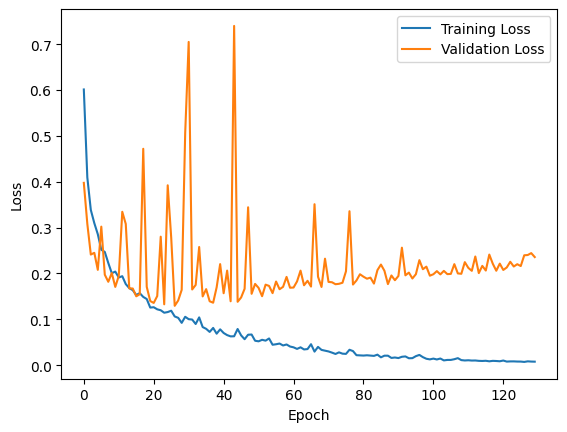

Finished Training


In [31]:
overfit_model = Net()
LEARNING_RATE=0.01
EPOCHS=130

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(overfit_model.parameters(), lr=LEARNING_RATE)

train_losses = []
val_losses = []

overfit_model = overfit_model.to(device)
start = time.time()
for epoch in range(EPOCHS):

  train_loss = 0.0
  val_loss = 0.0
  train_count = 0.0
  val_count = 0.0
  
  overfit_model.train()
  for inputs, labels in trainloader:
      #training loop
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      outputs = overfit_model(inputs)
      labels = labels.unsqueeze(1)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      train_count += 1.0
      train_loss += loss.item()
    

  overfit_model.eval()
  with torch.no_grad():
    for inputs, targets in valloader:
      #validation loop
      inputs = inputs.to(device)
      targets = targets.to(device)

      outputs = overfit_model(inputs)
      targets = targets.unsqueeze(1)
      loss = criterion(outputs, targets)

      val_count += 1.0
      val_loss += loss.item()

    # epoch kayiplarini ekrana yazdir
  train_loss /= train_count
  val_loss /= val_count
  print(f"Epoch {epoch+1} train loss: {train_loss}, validation loss: {val_loss}")

  train_losses.append(train_loss)
  val_losses.append(val_loss)

end = time.time()

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
        

print('Finished Training')